# THE COMPANY

**Company Name:**
- Dream Housing Finance company

**What We Know About Them:**
- Deals in all home loans.
- They have a presence across all urban, semi-urban and rural areas.
- The customer first applies for home loan after that company validates the customer's eligibility for a loan.

# THE PROBLEM & GOAL

**Problem:**
- The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.

**Goal:**
- These details (features we will use to predict) are as follows:
  - Gender
  - Marital Status
  - Education
  - Number of Dependents
  - Income
  - Loan Amount
  - Credit History
  - Property Area
  

- Which will let us determine the target variable which is:
  - Loan Status

# OUTLINE FOR NOTEBOOK

**Problem Type:**

Classification (Binary)

**Chosen Model:** 

XGBoost (eXtreme Gradient Boosting)

**Automated Hyperparameter Tuning:** 

True (GridSearchCV)

**How an XGB Binary Classifier Works:**
- XGBoost is a powerful gradient boosting algorithm that creates a predictive model by combining many weak predictive models.
- In binary classification, XGBoost creates decision trees to classify an input into one of the two possible output classes.
- The algorithm starts by building an initial decision tree, and then iteratively builds additional trees to correct the errors made by the previous tree.
- During the iterative process, each new tree is built to fit the residuals (i.e., the difference between the actual and predicted values) of the previous tree.
- This continues until a certain stopping condition is met or until the specified number of trees is reached.
- Once all the trees have been built, the algorithm makes predictions by summing the outputs of all the trees.

**How Automated Hyperparameter Tuning Works (GridSearchCV):**

- Hyperparameters are model parameters that are not learned during the training process but must be set before training begins.
- Hyperparameters can significantly impact the performance of a machine learning model.
- GridSearchCV is an automated hyperparameter tuning technique that helps to identify the optimal hyperparameter values for a given machine learning model.
- GridSearchCV works by defining a search space for each hyperparameter, specifying the range of values that should be considered.
- The algorithm then evaluates the model's performance for each possible combination of hyperparameter values in the search space.
- The hyperparameter combination that results in the best performance (as defined by the chosen performance metric) is selected as the optimal hyperparameter values for the model.
- By automating the hyperparameter tuning process, GridSearchCV can save time and improve the accuracy of the model.

# IMPORT LIBRARIES

In [1]:
# Typical Data Science Stuff
import pandas as pd
import numpy as np
from scipy import stats
import os
import sys
import time

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Dimensionality Reduction
from sklearn.manifold import TSNE

# Missing Values
from scipy.stats import trim_mean

# Outlier Removal Methods
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

# Automated Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Splitting Into Train and Test Set
from sklearn.model_selection import train_test_split

# Scaling Solutions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Machine Learning Model
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Oversampling
from imblearn.over_sampling import SMOTE

# Saving the Model
import h5py

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# LOAD DATA

In [2]:
# Change current working directory to Kaggle Project
os.chdir("/kaggle/input/home-loan-approval/")

# Load the dataset into a pandas DataFrame with column names | Had to specify column names here to avoid isolation forest warning msg
dataframe_one = pd.read_csv("loan_sanction_train.csv", header=0, names=["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"])

# CLEAN: GET INFO

In [3]:
# Print the ammount of rows and columns in the dataframe
print("[SHAPE BREAKDOWN]\n{} rows and {} columns".format(dataframe_one.shape[0], dataframe_one.shape[1]))

# Show the names of each column in the dataframe
print("\n[COLUMN BREAKDOWN]")
print(dataframe_one.columns)

# Print the first 10 rows of the dataframe
print("\n[FIRST 10 ROWS PREVIEW]")
dataframe_one.head(10)

[SHAPE BREAKDOWN]
614 rows and 13 columns

[COLUMN BREAKDOWN]
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

[FIRST 10 ROWS PREVIEW]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# CLEAN: F-ENGINEERING

In [4]:
# Show the number of unique values in each column
print("[UNIQUE VALUES PER COLUMN]\n")
dataframe_one.nunique()

[UNIQUE VALUES PER COLUMN]



Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
# SHow the number of numerical and non-numerical columns in the dataframe
print("[PRE CONVERSION]\n Number of numerical columns: {}".format(dataframe_one.select_dtypes(include=np.number).shape[1]))
print("\n[PRE CONVERSION]\n Number of non-numerical columns: {}".format(dataframe_one.select_dtypes(exclude=np.number).shape[1]))

[PRE CONVERSION]
 Number of numerical columns: 5

[PRE CONVERSION]
 Number of non-numerical columns: 8


In [6]:
# SHow cleaning steps taken message
print("\n[CONVERSIONS MADE]")

# Change values in the "Married" column that say "Yes" to 1 and "No"
dataframe_one['Married'] = dataframe_one['Married'].replace({'Yes': 1, 'No': 0})
print("- Married column values changed to 1 and 0")

# Change values in the "Self_Employed" column that say "Yes" to 1 and "No" to 0
dataframe_one['Self_Employed'] = dataframe_one['Self_Employed'].replace({'Yes': 1, 'No': 0})
print("- Self_Employed column values changed to 1 and 0")

# Change values in the "Loan_Status" column that say "Y" to 1 and "N" to 0
dataframe_one['Loan_Status'] = dataframe_one['Loan_Status'].replace({'Y': 1, 'N': 0})
print("- Loan_Status column values changed to 1 and 0")

# Change values in the "Education" column that say "Graduate" to 1 and "Not Graduate" to 0
dataframe_one['Education'] = dataframe_one['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
print("- Education column values changed to 1 and 0")

# Change values in the Gender column that say "Male" to 1 and "Female" to 0
dataframe_one['Gender'] = dataframe_one['Gender'].replace({'Male': 1, 'Female': 0})
print("- Gender column values changed to 1 and 0")

# Change values in the dataframe that say "Rural" to 0, values that say "Semiurban" to 1 and values that say "Urban" to 2
dataframe_one['Property_Area'] = dataframe_one['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
print("- Property_Area column values changed to 0, 1 and 2")

# Change values in the dataframe that say "3+" to 3
dataframe_one['Dependents'] = dataframe_one['Dependents'].replace({'3+': 3})
print("- Dependents column values that say 3+ changed to 3")

# Drop loan ID column
dataframe_one = dataframe_one.drop('Loan_ID', axis=1)
print("- Loan_ID column dropped")

# Convert all values in the dataframe to numeric now that we have converted all non-numerical values to numerical values
dataframe_one = dataframe_one.apply(pd.to_numeric, errors='coerce')
print("- Converted all values in the dataframe to numeric now that we have converted all non-numerical values to numerical values")

# Show number of numerical and non-numerical columns in the dataframe
print("\n[POST CONVERSION]\n Number of numerical columns: {}".format(dataframe_one.select_dtypes(include=np.number).shape[1]))
print("\n[POST CONVERSION]\n Number of non-numerical columns: {}".format(dataframe_one.select_dtypes(exclude=np.number).shape[1]))


[CONVERSIONS MADE]
- Married column values changed to 1 and 0
- Self_Employed column values changed to 1 and 0
- Loan_Status column values changed to 1 and 0
- Education column values changed to 1 and 0
- Gender column values changed to 1 and 0
- Property_Area column values changed to 0, 1 and 2
- Dependents column values that say 3+ changed to 3
- Loan_ID column dropped
- Converted all values in the dataframe to numeric now that we have converted all non-numerical values to numerical values

[POST CONVERSION]
 Number of numerical columns: 12

[POST CONVERSION]
 Number of non-numerical columns: 0


In [7]:
# Print the first 10 rows of the dataframe
print("\n[FIRST 10 ROWS PREVIEW]")
dataframe_one.head(10)


[FIRST 10 ROWS PREVIEW]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1
7,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,2,1
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0


# CLEAN: MISSING VALUES

In [8]:
# Look for missing values in the dataframe
print("[PRE FILLING]\n Total missing values is {}".format(dataframe_one.isnull().sum().sum()))
print("\n[PRE FILLING]\n Missing values by column is as follows:")
dataframe_one.isnull().sum()

[PRE FILLING]
 Total missing values is 149

[PRE FILLING]
 Missing values by column is as follows:


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Convert all values in the dataframe to numeric
dataframe_one = dataframe_one.apply(pd.to_numeric, errors='coerce')

# Fill the missing values in the all columns of the dataframe with a trimmed meaan of 10%
dataframe_one = dataframe_one.apply(lambda x: x.fillna(trim_mean(x, 0.1)), axis=0)

# Print the total number of missing values in the dataframe
print("[FILLING METHOD]\n Trimmed Mean 10%\n")
print("[POST FILLING]\n Total missing values is {}".format(dataframe_one.isnull().sum().sum()))
print("\n[POST FILLING]\n Missing values by column is as follows:")
dataframe_one.isnull().sum()

[FILLING METHOD]
 Trimmed Mean 10%

[POST FILLING]
 Total missing values is 0

[POST FILLING]
 Missing values by column is as follows:


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# CLEAN: ROUNDING

In [10]:
# Convert all values in the dataframe to integer
dataframe_one = dataframe_one.astype(int)

# Print the first 10 rows of the dataframe
print("\n[FIRST 10 ROWS PREVIEW]")
dataframe_one.head(10)


[FIRST 10 ROWS PREVIEW]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,138,360,1,2,1
1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1
5,1,1,2,1,1,5417,4196,267,360,1,2,1
6,1,1,0,0,0,2333,1516,95,360,1,2,1
7,1,1,3,1,0,3036,2504,158,360,0,1,0
8,1,1,2,1,0,4006,1526,168,360,1,2,1
9,1,1,1,1,0,12841,10968,349,360,1,1,0


# EDA: SPEARMAN CORRELATION HEATMAP

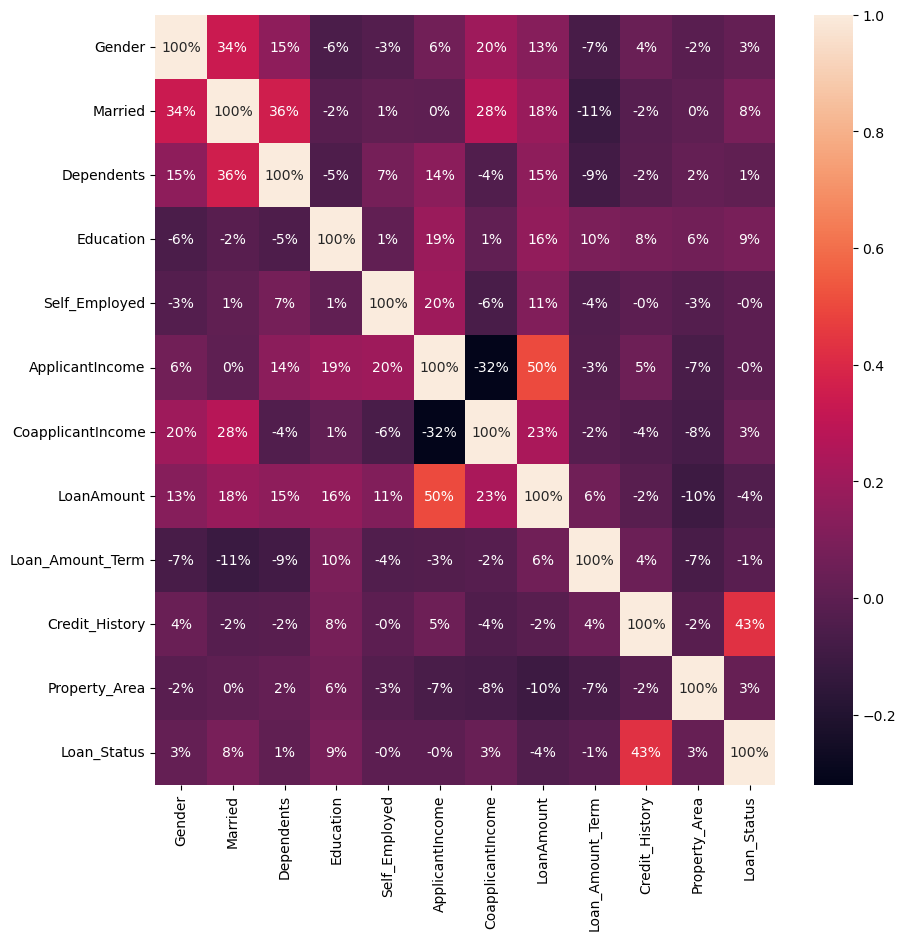

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dataframe_one.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

# EDA: FREQUENCY DISTRIBUTION

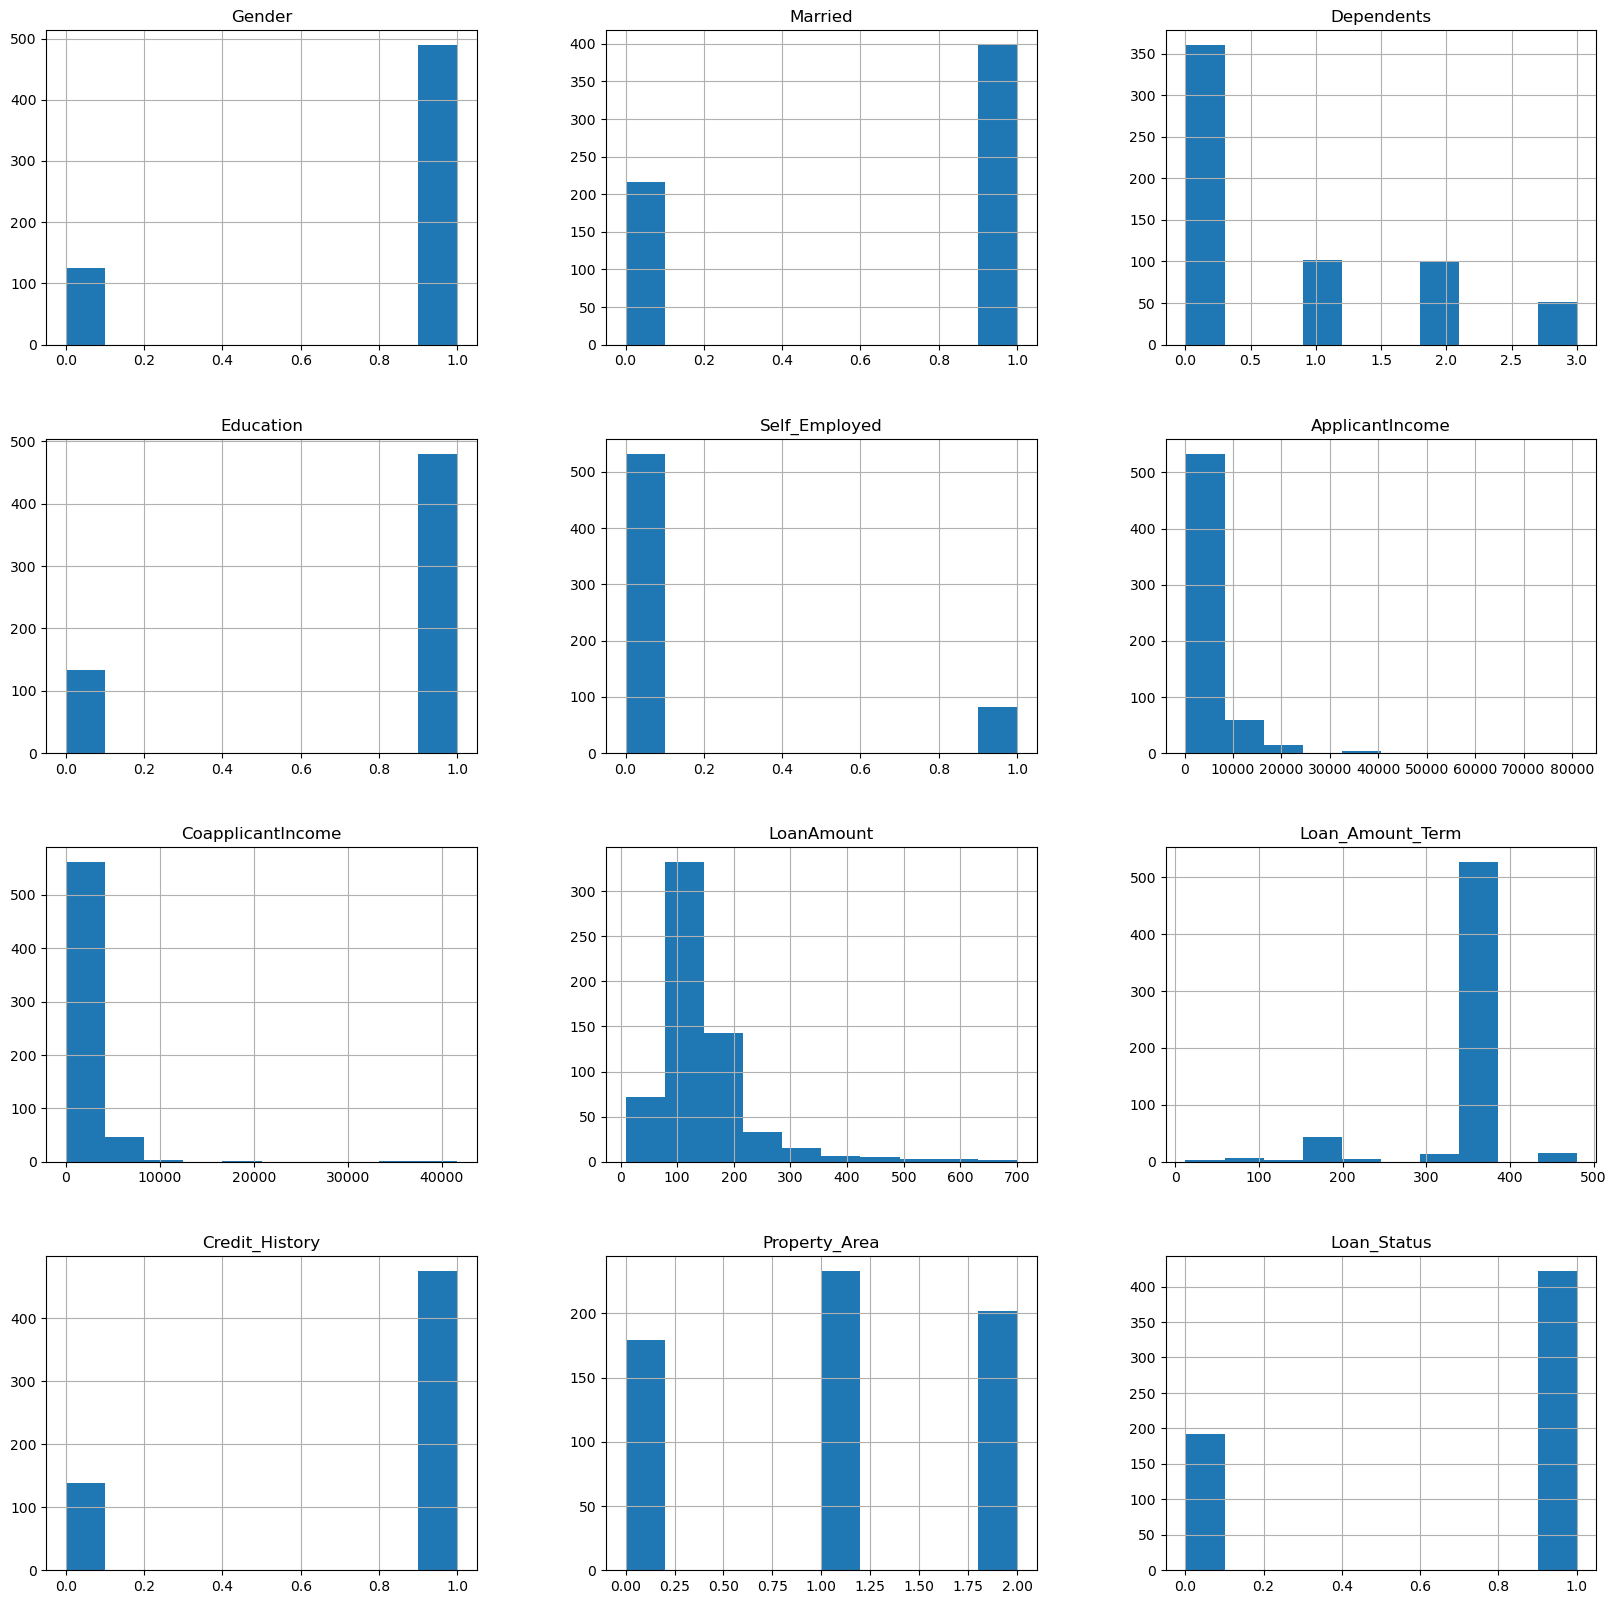

In [12]:
# Show the distribution of values in each column of the dataframe
dataframe_one.hist(figsize=(20, 20))
plt.show()

# EDA: BOX PLOTS

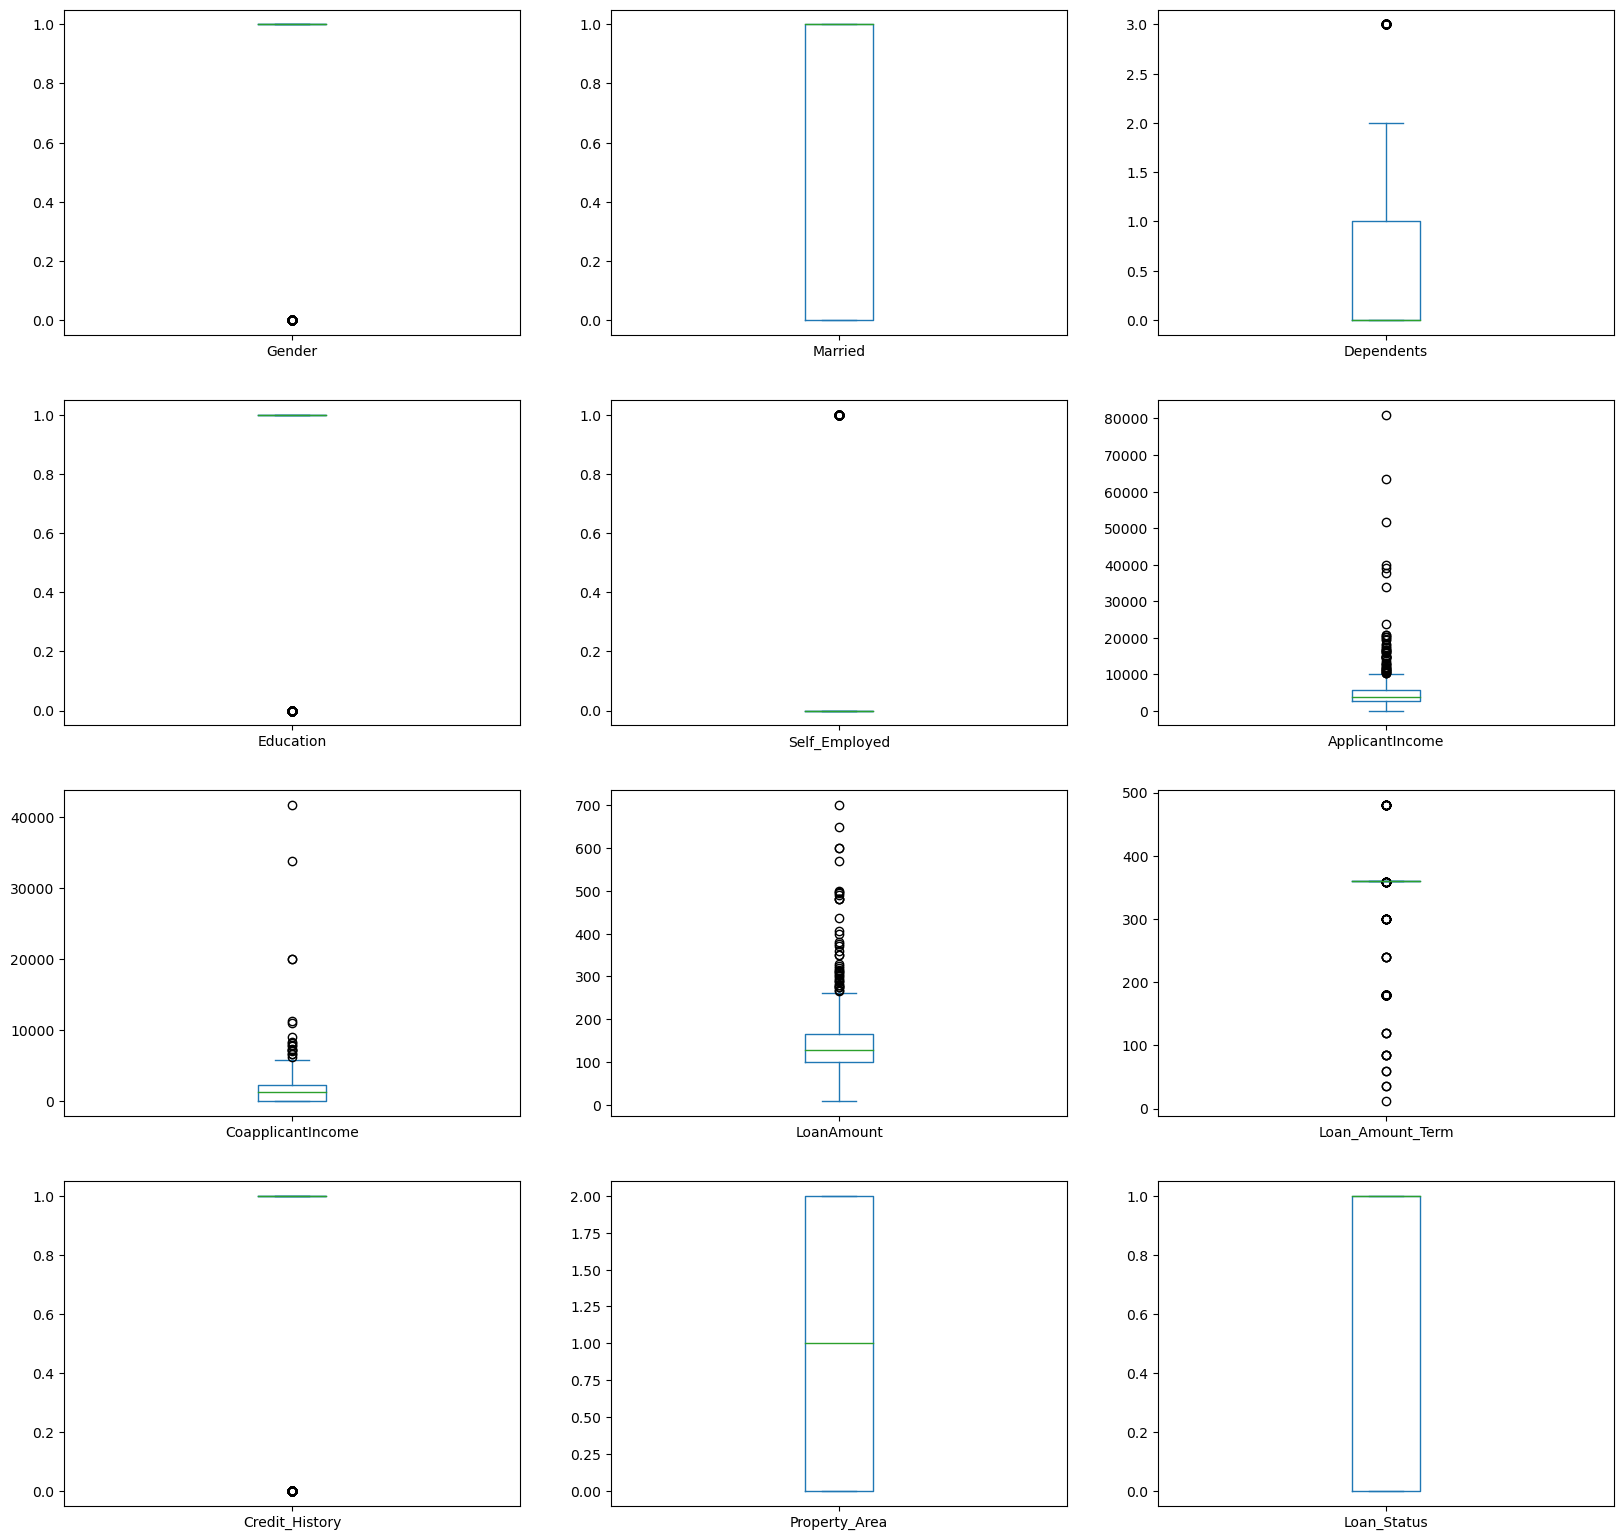

In [13]:
# Show horizontal box plots of each column in the dataframe
dataframe_one.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

# EDA: VIOLIN PLOTS

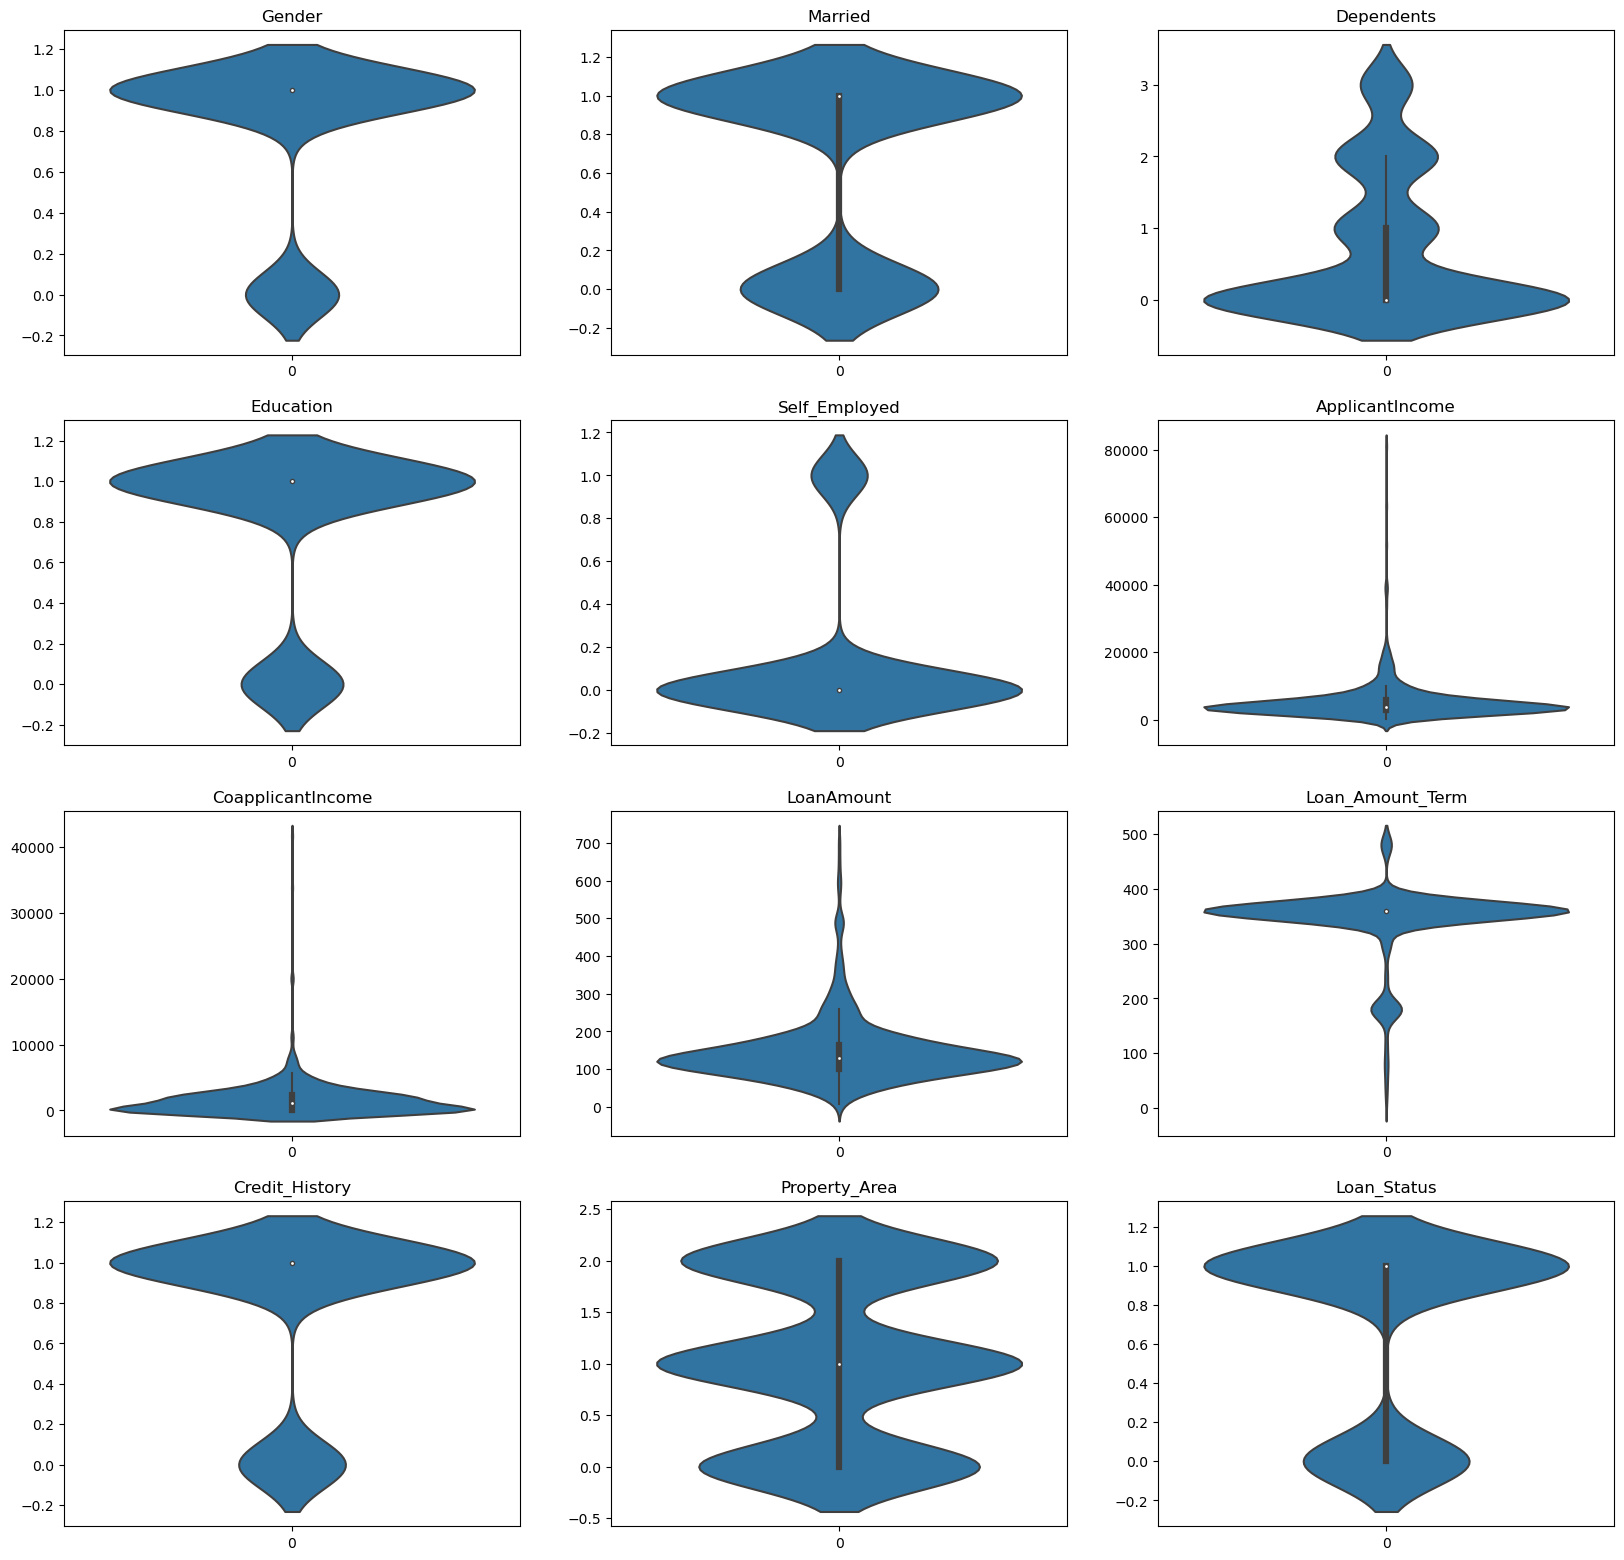

In [14]:
# Show violin plots of each column in the dataframe
plt.figure(figsize=(20, 60))
for i, column in enumerate(dataframe_one.columns):
    plt.subplot(12, 3, i+1)
    sns.violinplot(dataframe_one[column])
    plt.title(column)
plt.show()

# OUTLIER REMOVAL PREVIEWS

In [15]:
# Preview the effects of multiple outlier removal methods on the dataframe and show how many outliers each would remove
print("[OUTLIER REMOVAL PREVIEW]\n")

# Create a copy of the dataframe
dataframe_two = dataframe_one.copy()

# Remove outliers using the IQR method
Q1 = dataframe_two.quantile(0.25)
Q3 = dataframe_two.quantile(0.75)
IQR = Q3 - Q1
dataframe_two = dataframe_two[~((dataframe_two < (Q1 - 1.5 * IQR)) |(dataframe_two > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the number of rows in the dataframe before and after IQR outlier removal
print("PRE IQR OUTLIER REMOVAL ROWS: {}".format(dataframe_one.shape[0]))
print("POST IQR OUTLIER REMOVAL ROWS: {}".format(dataframe_two.shape[0]))

# Create a copy of the dataframe
dataframe_three = dataframe_one.copy()

# Remove outliers using the Z-Score method
dataframe_three = dataframe_three[(np.abs(stats.zscore(dataframe_three)) < 3).all(axis=1)]

# Print the number of rows in the dataframe before and after Z-Score outlier removal
print("PRE Z-SCORE OUTLIER REMOVAL ROWS: {}".format(dataframe_one.shape[0]))
print("POST Z-SCORE OUTLIER REMOVAL ROWS: {}".format(dataframe_three.shape[0]))

# Create a copy of the dataframe
dataframe_four = dataframe_one.copy()

# Set the column names of the input data for IsolationForest
X = dataframe_four.values
X_column_names = dataframe_four.columns
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(X)

# Predict outliers and remove them from the dataframe
y_noano = isolation_forest.predict(X)
y_noano = pd.DataFrame(y_noano, columns=['Top'])
y_noano = y_noano[y_noano['Top'] == 1]
outlier_indices = y_noano.index
dataframe_four = dataframe_four.iloc[outlier_indices]
dataframe_four.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after isolation forest outlier removal
print("PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(dataframe_one.shape[0]))
print("POST ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(dataframe_four.shape[0]))

# Create a copy of the dataframe
dataframe_five = dataframe_one.copy()

# Remove outliers using local outlier factor method
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_noano = local_outlier_factor.fit_predict(dataframe_five)
y_noano = pd.DataFrame(y_noano, columns=['Top'])
y_noano[y_noano['Top'] == 1].index.values
dataframe_five = dataframe_five.iloc[y_noano[y_noano['Top'] == 1].index.values]
dataframe_five.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after local outlier factor outlier removal
print("PRE LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: {}".format(dataframe_one.shape[0]))
print("POST LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: {}".format(dataframe_five.shape[0]))

# Create a copy of the dataframe
dataframe_six = dataframe_one.copy()

# Remove outliers using One Class SVM method
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
y_noano = one_class_svm.fit_predict(dataframe_six)
y_noano = pd.DataFrame(y_noano, columns=['Top'])
y_noano[y_noano['Top'] == 1].index.values
dataframe_six = dataframe_six.iloc[y_noano[y_noano['Top'] == 1].index.values]
dataframe_six.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after one class SVM outlier removal
print("PRE ONE CLASS SVM OUTLIER REMOVAL ROWS: {}".format(dataframe_one.shape[0]))
print("POST ONE CLASS SVM OUTLIER REMOVAL ROWS: {}".format(dataframe_six.shape[0]))

# Create a copy of the dataframe
dataframe_seven = dataframe_one.copy()

# Remove outliers using DBSCAN method
dbscan = DBSCAN(eps=0.5, min_samples=10)
y_noano = dbscan.fit_predict(dataframe_seven)
y_noano = pd.DataFrame(y_noano, columns=['Top'])
y_noano[y_noano['Top'] == 1].index.values
dataframe_seven = dataframe_seven.iloc[y_noano[y_noano['Top'] == 1].index.values]
dataframe_seven.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after DBSCAN outlier removal
print("PRE DBSCAN OUTLIER REMOVAL ROWS: {}".format(dataframe_one.shape[0]))
print("POST DBSCAN OUTLIER REMOVAL ROWS: {}".format(dataframe_seven.shape[0]))

[OUTLIER REMOVAL PREVIEW]

PRE IQR OUTLIER REMOVAL ROWS: 614
POST IQR OUTLIER REMOVAL ROWS: 183
PRE Z-SCORE OUTLIER REMOVAL ROWS: 614
POST Z-SCORE OUTLIER REMOVAL ROWS: 577
PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: 614
POST ISOLATION FOREST OUTLIER REMOVAL ROWS: 552
PRE LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: 614
POST LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: 552
PRE ONE CLASS SVM OUTLIER REMOVAL ROWS: 614
POST ONE CLASS SVM OUTLIER REMOVAL ROWS: 470
PRE DBSCAN OUTLIER REMOVAL ROWS: 614
POST DBSCAN OUTLIER REMOVAL ROWS: 0


# OUTLIER REMOVAL DECISION

In [16]:
# Decide on outlier removal method
dataframe_final = dataframe_one.copy()
print("[OUTLIER REMOVAL METHOD]\n NONE (ALL LEAD TO WORSE RESULTS)\n")
print("[PRE OUTLIER REMOVAL]\n Rows: {}".format(dataframe_one.shape[0]))
print("\n[POST OUTIER REMOVAL]\n Rows: {}".format(dataframe_final.shape[0]))

[OUTLIER REMOVAL METHOD]
 NONE (ALL LEAD TO WORSE RESULTS)

[PRE OUTLIER REMOVAL]
 Rows: 614

[POST OUTIER REMOVAL]
 Rows: 614


# T-SNE PREVIEW (DIMENSIONALITY REDUCTION)

In [17]:
# Create a copy of the dataframe
dataframe_tsne = dataframe_final.copy()

# Create the X and y variables
X = dataframe_tsne.drop('Loan_Status', axis=1)
y = dataframe_tsne['Loan_Status']

# Create the TSNE model
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a new dataframe with the TSNE data
dataframe_tsne = pd.concat([pd.DataFrame(X_tsne), y], axis=1)
dataframe_tsne.columns = ['x', 'y', 'z', 'Loan_Status']

# Create the interactive 3D TSNE plot
fig = px.scatter_3d(dataframe_tsne, x='x', y='y', z='z', color='Loan_Status', opacity=0.5, width=800, height=800)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# T-SNE DECISION (DIMENSIONALITY REDUCTION)

In [18]:
print("[SKIPPING T-SNE]")
# dataframe_final = _____

[SKIPPING T-SNE]


# OVERSAMPLING

In [19]:
# Oversample the values in the target column to balance the dataset

# Create the X and y variables
X = dataframe_final.drop('Loan_Status', axis=1)
y = dataframe_final['Loan_Status']

# Oversample the values in the target column
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Create a new dataframe with the oversampled data
dataframe_final = pd.concat([X_sm, y_sm], axis=1)

# Print the number of rows in the dataframe before and after oversampling
print("[PRE OVERSAMPLING]\n Rows : {}".format(dataframe_one.shape[0]))
print("\n[POST OVERSAMPLING]\n Rows : {}".format(dataframe_final.shape[0]))

print("\n[POST OVERSAMPLING BREAKDOWN]")
dataframe_final['Loan_Status'].value_counts()

[PRE OVERSAMPLING]
 Rows : 614

[POST OVERSAMPLING]
 Rows : 844

[POST OVERSAMPLING BREAKDOWN]


1    422
0    422
Name: Loan_Status, dtype: int64

# MAKE TRAIN/TEST SETS

In [20]:
# Split the data into training and testing sets
X = dataframe_final.drop('Loan_Status', axis=1)
y = dataframe_final['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Show the shapes of the training and testing sets for both the features and the target
print("[TRAINING SET FEATURES SHAPE]\n {}".format(X_train.shape))
print("\n[TRAINING SET TARGET SHAPE]\n {}".format(y_train.shape))
print("\n[TESTING SET FEATURES SHAPE]\n {}".format(X_test.shape))
print("\n[TESTING SET TARGET SHAPE]\n {}".format(y_test.shape))

[TRAINING SET FEATURES SHAPE]
 (759, 11)

[TRAINING SET TARGET SHAPE]
 (759,)

[TESTING SET FEATURES SHAPE]
 (85, 11)

[TESTING SET TARGET SHAPE]
 (85,)


# SCALE DATA

In [21]:
# Scale the training and testing data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scale the training and testing data using ZScoreScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# TRAINING & TESTING

In [22]:
# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

# create a dictionary of every possible xgb parameters to search for the best parameters
xgb_params = {
    "n_estimators": [239, 240, 241],
    "max_depth": [5, 6, 7, 8, 9],
    "learning_rate": [0.1, 0.2, 0.3],
    "subsample": [0.4, 0.5, 0.7, 0.9],
    "colsample_bytree": [0.2, 0.5, 0.7, 0.9],
}

# Create a grid search object and fit it to the data to find the best parameters
grid = GridSearchCV(xgb, xgb_params, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Create an XGBoost classifier with the best parameters
xgb = XGBClassifier(random_state=42, n_estimators=grid.best_params_['n_estimators'], learning_rate=grid.best_params_['learning_rate'], max_depth=grid.best_params_['max_depth'], subsample=grid.best_params_['subsample'], colsample_bytree=grid.best_params_['colsample_bytree'])

# Train the classifier
xgb.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = xgb.predict(X_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


# RESULTS & EVALUATION

In [23]:
# Print the best parameters found by the grid search
print("BEST PARAMETERS:\n {}".format(grid.best_params_))

# Print the accuracy, precision, recall, and F1 score of the classifier for both the training and testing data
print("\nTRAINING ACCURACY: {:.2%}".format(accuracy_score(y_train, xgb.predict(X_train))))
print("TESTING ACCURACY: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("\nTRAINING PRECISION: {:.2%}".format(precision_score(y_train, xgb.predict(X_train))))
print("TESTING PRECISION: {:.2%}".format(precision_score(y_test, y_pred)))
print("\nTRAINING RECALL: {:.2%}".format(recall_score(y_train, xgb.predict(X_train))))
print("TESTING RECALL: {:.2%}".format(recall_score(y_test, y_pred)))
print("\nTRAINING F1 SCORE: {:.2%}".format(f1_score(y_train, xgb.predict(X_train))))
print("TESTING F1 SCORE: {:.2%}".format(f1_score(y_test, y_pred)))

# Show the first 25 predictions of the classifier and their actual values in text form
print("\n[FIRST 25 PREDICTIONS]\n {}".format(y_pred[:25]))
print("\n[FIRST 25 ACTUAL VALUES]\n {}".format(y_test[:25].values))

# Print a confusion matrix for the testing data
print("\nCONFUSION MATRIX:\n {}".format(confusion_matrix(y_test, y_pred)))

BEST PARAMETERS:
 {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 239, 'subsample': 0.9}

TRAINING ACCURACY: 100.00%
TESTING ACCURACY: 82.35%

TRAINING PRECISION: 100.00%
TESTING PRECISION: 75.00%

TRAINING RECALL: 100.00%
TESTING RECALL: 89.19%

TRAINING F1 SCORE: 100.00%
TESTING F1 SCORE: 81.48%

[FIRST 25 PREDICTIONS]
 [1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1]

[FIRST 25 ACTUAL VALUES]
 [1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1]

CONFUSION MATRIX:
 [[37 11]
 [ 4 33]]


# PLOT PREDICTIONS

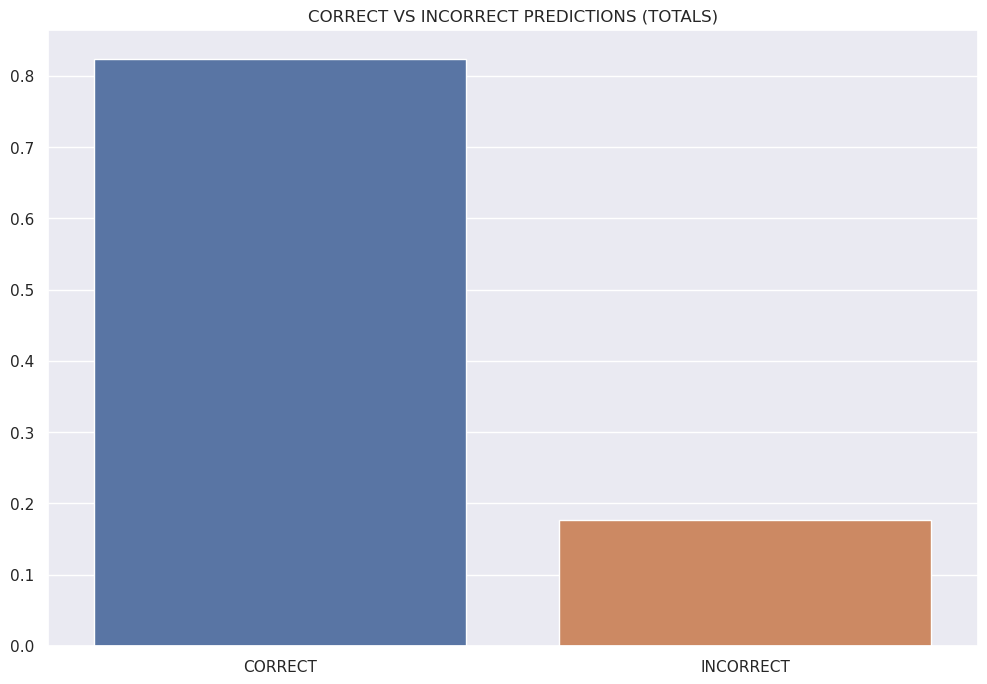

In [24]:
# Plot the the correct and incorrect predictions of the classifier using a seaborn bar graph with proper labeling and titling
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[accuracy_score(y_test, y_pred), 1-accuracy_score(y_test, y_pred)])
plt.title('CORRECT VS INCORRECT PREDICTIONS (TOTALS)')
plt.show()

# PLOT FEATURE IMPORTANCE

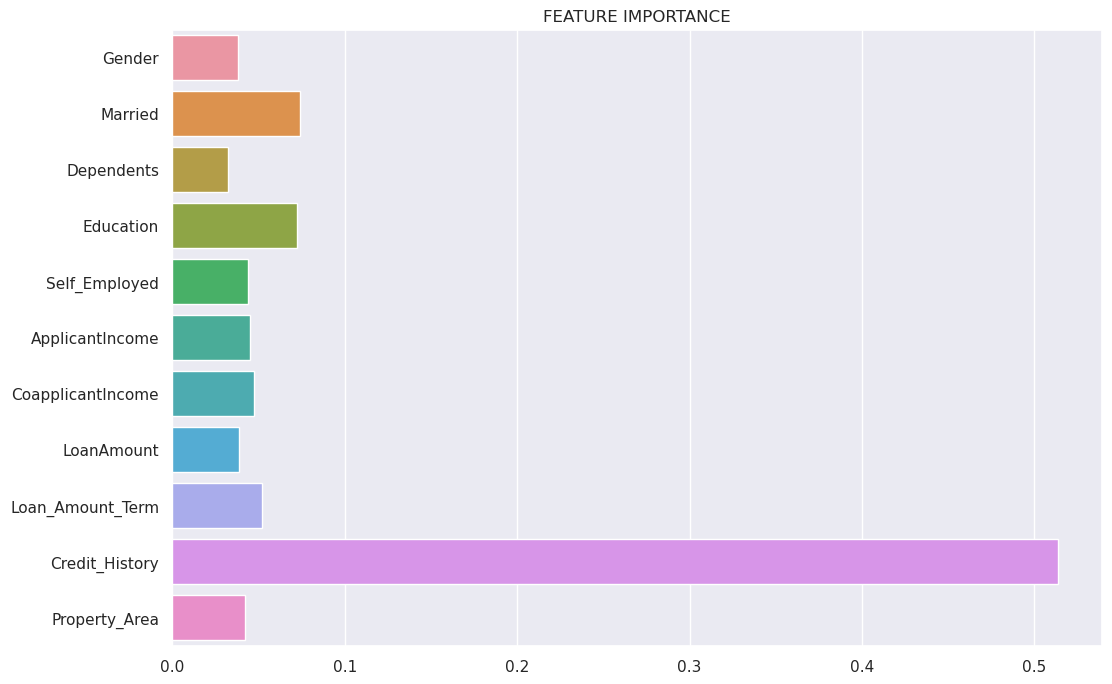

In [25]:
# Plot the feature importance of the classifier using seaborn
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()

# SAVE THE MODEL

In [26]:
xgb.save_model('/kaggle/working/model.h5')
print("Model saved as model.h5")

Model saved as model.h5


# IN DEPTH MODEL BREAKDOWN

In [27]:
# Print the model dump to the console
xgb.get_booster().dump_model(sys.stdout)

booster[0]:
0:[f9<0.5] yes=1,no=2,missing=1
	1:[f5<0.234366119] yes=3,no=4,missing=3
		3:[f6<0.192178458] yes=7,no=8,missing=7
			7:[f7<0.0745296627] yes=13,no=14,missing=13
				13:leaf=-0.0400000028
				14:leaf=-0.146551728
			8:leaf=-0.0400000028
		4:leaf=0.0500000007
	2:[f1<0.5] yes=5,no=6,missing=5
		5:[f7<0.262662828] yes=9,no=10,missing=9
			9:[f5<0.028534323] yes=15,no=16,missing=15
				15:[f6<0.0145558836] yes=23,no=24,missing=23
					23:[f5<0.0261719227] yes=37,no=38,missing=37
						37:leaf=-0
						38:leaf=-0.127272725
					24:[f6<0.0644514859] yes=39,no=40,missing=39
						39:leaf=0.127272725
						40:leaf=-0.0500000007
				16:[f5<0.0395238101] yes=25,no=26,missing=25
					25:[f6<0.0159958713] yes=41,no=42,missing=41
						41:[f3<0.5] yes=55,no=56,missing=55
							55:leaf=-0.0500000007
							56:[f7<0.105643995] yes=67,no=68,missing=67
								67:leaf=0.125
								68:leaf=-0
						42:leaf=0.157894745
					26:[f5<0.0427767485] yes=43,no=44,missing=43
						43:[f7<0.1193921